# 先import  所需資料

In [6]:
from datetime import datetime
import MetaTrader5 as mt5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import pytz

# 連接到MT5終端

In [12]:
# establish connection to MetaTrader 5 terminal
if not mt5.initialize("C:\\Program Files\\MetaTrader 5\\terminal64.exe"):
    print("initialize() failed, error code =",mt5.last_error())
    quit()

# display data on MetaTrader 5 version
print(mt5.version())

# display info on the terminal settings and status
terminal_info=mt5.terminal_info()
if terminal_info!=None:
    # display the terminal data 'as is'
    print(terminal_info)
    # display data in the form of a list
    print("Show terminal_info()._asdict():")
    terminal_info_dict = mt5.terminal_info()._asdict()
    for prop in terminal_info_dict:
        print("  {}={}".format(prop, terminal_info_dict[prop]))
    print()
    # convert the dictionary into DataFrame and print
    df=pd.DataFrame(list(terminal_info_dict.items()),columns=['property','value'])
    print("terminal_info() as dataframe:")
    print(df)

(500, 3116, '26 Nov 2021')
TerminalInfo(community_account=False, community_connection=False, connected=True, dlls_allowed=False, trade_allowed=False, tradeapi_disabled=False, email_enabled=False, ftp_enabled=False, notifications_enabled=False, mqid=False, build=3116, maxbars=100000, codepage=950, ping_last=252643, community_balance=0.0, retransmission=0.0, company='MetaQuotes Software Corp.', name='MetaTrader 5', language='Chinese (Traditional)', path='C:\\Program Files\\MetaTrader 5', ...)
Show terminal_info()._asdict():
  community_account=False
  community_connection=False
  connected=True
  dlls_allowed=False
  trade_allowed=False
  tradeapi_disabled=False
  email_enabled=False
  ftp_enabled=False
  notifications_enabled=False
  mqid=False
  build=3116
  maxbars=100000
  codepage=950
  ping_last=252643
  community_balance=0.0
  retransmission=0.0
  company=MetaQuotes Software Corp.
  name=MetaTrader 5
  language=Chinese (Traditional)
  path=C:\Program Files\MetaTrader 5
  data_path

# 取資料

In [28]:
# set time zone to TW
tw = pytz.timezone('Asia/Taipei')
# create 'datetime' objects in UTC time zone to avoid the implementation of a local time zone offset
tw_from = datetime(2010, 1, 1, tzinfo=tw)
tw_to = datetime(2021, 1, 1, tzinfo=tw)
# get bars from EURUSD D1 within the interval
rates = mt5.copy_rates_range("EURUSD", mt5.TIMEFRAME_D1, tw_from, tw_to)
# shut down connection to the MetaTrader 5 terminal


# 轉化資料格式

In [50]:
# convert to Dataframe
rates = pd.DataFrame(rates)
# convert .time to datetime
rates.time = pd.to_datetime(rates.time, unit='s')
# get percent change (price returns)
returns = pd.DataFrame(rates['close'].pct_change(1))
returns = returns.set_index(rates['time'])
returns = returns[1:]
returns.head(5)

,close
time,
2010-01-05,-0.003379
2010-01-06,0.002604
2010-01-07,-0.006646
2010-01-08,0.007299
2010-01-11,0.007183


# 波動範圍，和內部範圍內的數值離散度

我們可以看到，五月份的增幅中位數偏移到零軸下方，且其異常值顯見高於零軸。 通常，從十年的統計數據里可以看出，五月份的市場相對於三月份有所下跌。 只有一個年份，五月份市場上漲。 這是一個有趣的思路，很符合交易者的格言“在五月份賣掉，並離開！”

我們看一下五月份之後的六月份。 相對於五月份，六月份市場幾乎總是（排除一年以外）在增長，這種情況每年都在重覆。 六月份的波動範圍很小，沒有異常值（與五月份不同），這表明良好的季節性穩定

十一月份。 在此期間市場下跌的概率很高。 之後，在十二月份，市場通常會再度上行。 一月份的波動性很高，且相對於十二月份有所下跌。

<AxesSubplot:title={'center':'close'}, xlabel='year'>

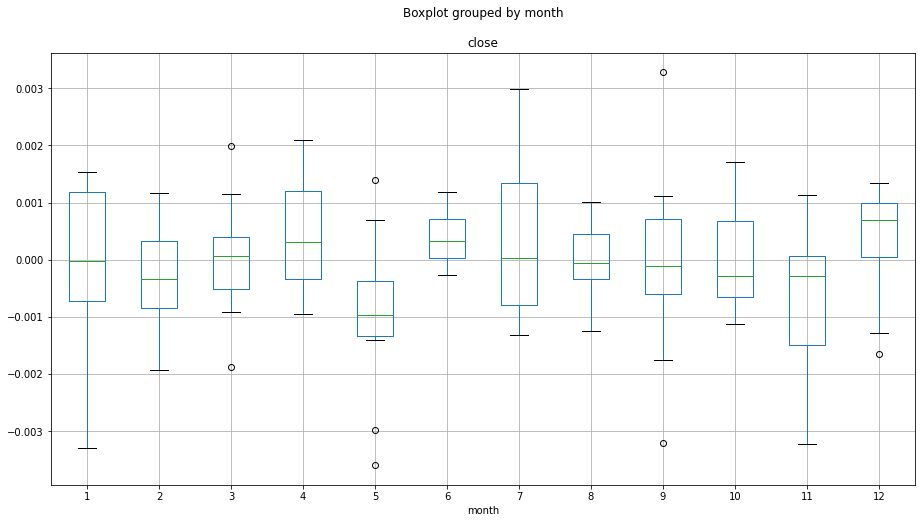

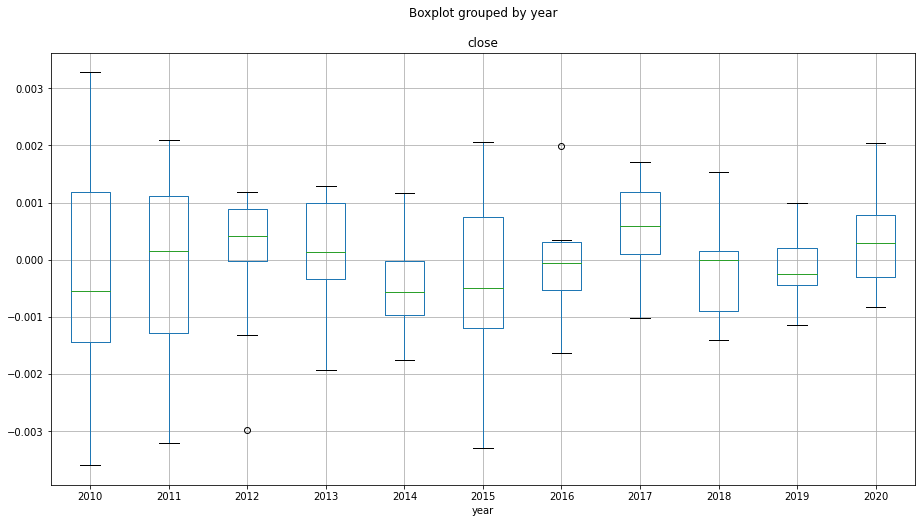

In [45]:
Monthly_Returns = returns.groupby([returns.index.year.rename('year'), returns.index.month.rename('month')]).mean()
Monthly_Returns.boxplot(column='close', by='month', figsize=(15, 8))
Monthly_Returns.boxplot(column='close', by='year', figsize=(15, 8))


日波動率幾乎保持不變。 然而不能據此得出結論，即在一周中的某個特定日期交易更為密集。 平均來說，市場在星期一和星期五時更傾向於下行非上行。 也許在一些單獨的月份中，按日分布的樣子會有所不同

相較起來，周波動率就顯得十分明顯，我們可以觀察到每個月的周波動率十分的明顯，證明了短期市場並沒有規律性

<AxesSubplot:title={'center':'close'}, xlabel='week'>

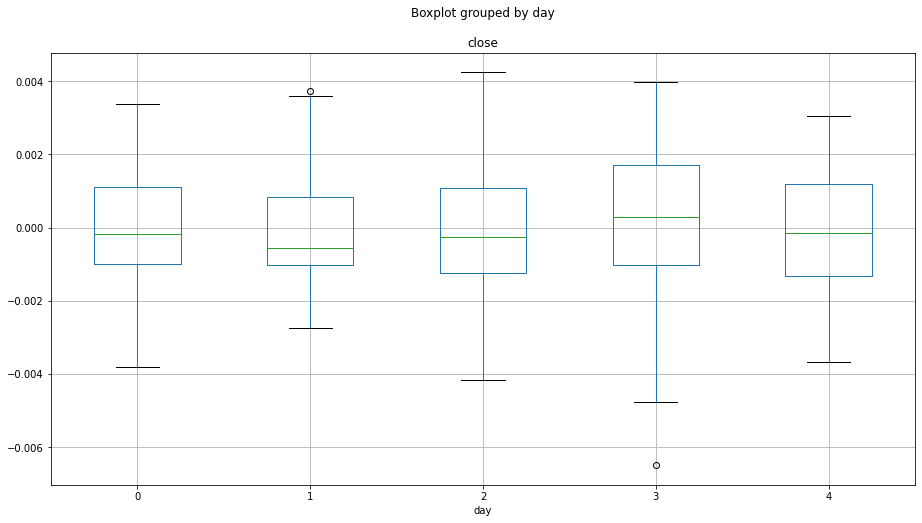

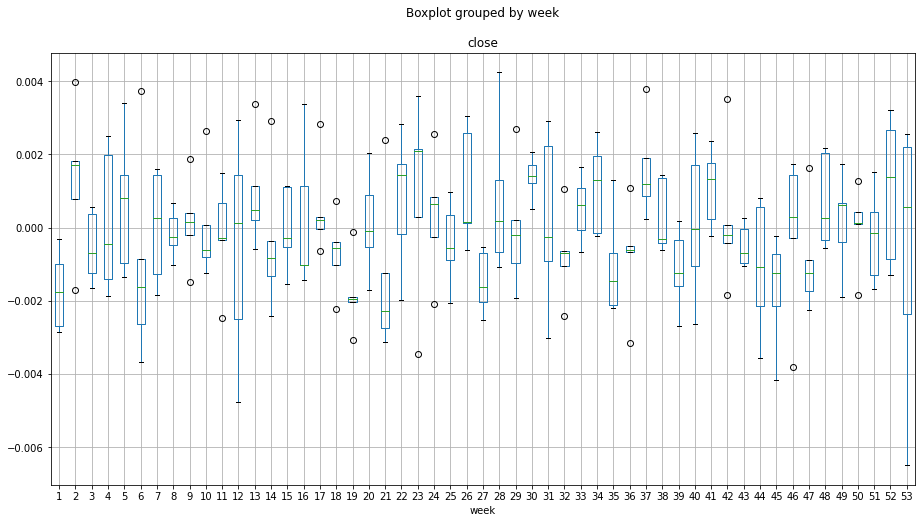

In [48]:
Daily_Returns = returns.groupby([returns.index.isocalendar().week.rename('week'), returns.index.dayofweek.rename('day')]).mean()
Daily_Returns.boxplot(column='close', by='day', figsize=(15, 8))
Daily_Returns.boxplot(column='close', by='week', figsize=(15, 8))

# 在一些單獨的月份中，按日分布的樣子會有所不同。 我們來執行附加分析

從兩張圖可以看出

<AxesSubplot:title={'center':'close'}, xlabel='day'>

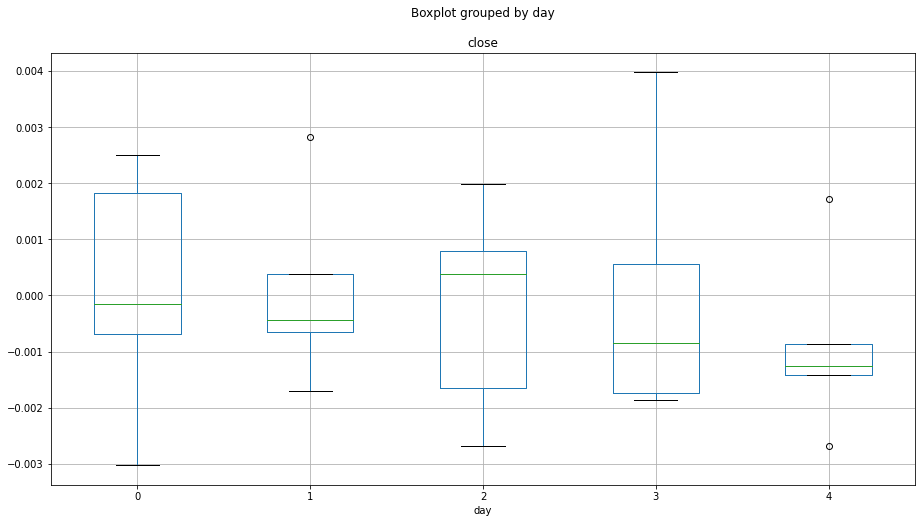

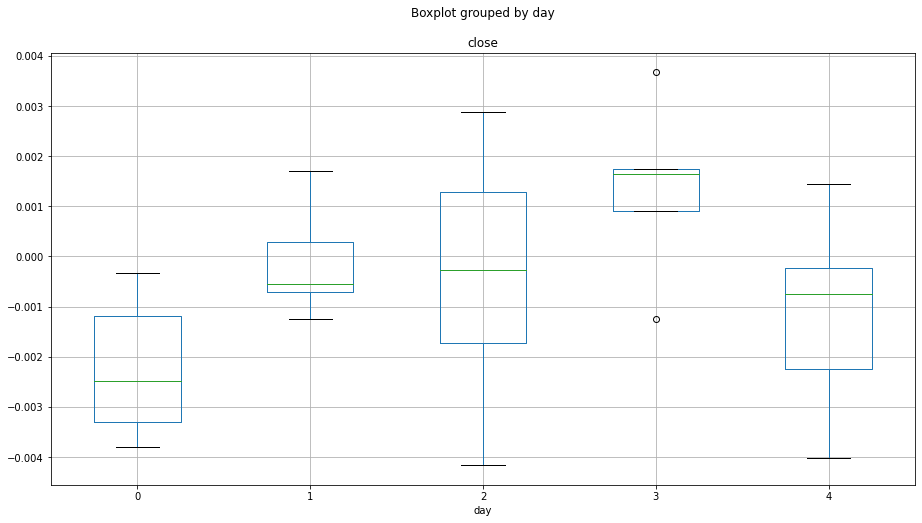

In [55]:
returns = pd.DataFrame(rates['close'].pct_change(1))
returns = returns.set_index(rates['time'])
returns = returns[1:]
#一月
Jan_returns = returns.drop(returns.index[~returns.index.month.isin([1])])
Jan_Daily_Returns = Jan_returns.groupby([Jan_returns.index.isocalendar().week.rename('week'), Jan_returns.index.dayofweek.rename('day')]).mean()
Jan_Daily_Returns.boxplot(column='close', by='day', figsize=(15, 8))
#十一月
Nov_returns = returns.drop(returns.index[~returns.index.month.isin([11])])
Nov_Daily_Returns = Nov_returns.groupby([Nov_returns.index.isocalendar().week.rename('week'), Nov_returns.index.dayofweek.rename('day')]).mean()
Nov_Daily_Returns.boxplot(column='close', by='day', figsize=(15, 8))

